In [1]:
# The following code will allow the user to compare a list of stellar objects with
# a list of known objects. The intention is to identify which sources from
# the original list are undiscovered. This is written for a case in which 
# the comparison dataset is a list of known rr lyra.
#
# Repeat sources will be removed, resulting in a final table of 
# unique objects.


# Author: Iman Behbehani
# Date: Spring 2023

In [2]:
# import necessary packages
import numpy as np  
import matplotlib.pyplot as plt 
import pandas as pd

In [3]:
# open the catalog and comparison files
text_file = open('/Users/iman/Documents/Midd_Coursework/catalog.csv')
text_file2 = open('/Users/iman/Documents/Midd_Coursework/rrlyrae.csv')

In [4]:
table = pd.read_csv(text_file)

In [5]:
catalog = table[['ra hh', 'ra mm','ra ss','dec hh','dec mm','dec ss']].copy()

In [6]:
table2 = pd.read_csv(text_file2)

In [7]:
comparison = table2[['ra hh', 'ra mm','ra ss','dec hh','dec mm','dec ss']].copy()

## remove duplicates

In [8]:
### This double for loop removes repeat candidates within the specified error

# creating a new dataframe for non repeated stars
df2 = pd.DataFrame(columns = ['num','ra hh', 'ra mm', 'ra ss', 'dec hh', 'dec mm', 'dec ss'])
# specify x and y errors
xerr=3
yerr=5

# sorting through 
for i in range(len(catalog)):
    rep = False
   
    for j in range(len(catalog)): # check with rest of catalog
        #ra min in col 2, dec min in col 6
        if((i!=j)and((catalog['ra ss'][j]-xerr)<catalog['ra ss'][i]<(catalog['ra ss'][j]+xerr))
           and((catalog['dec ss'][j]-yerr)<catalog['dec ss'][i]<(catalog['dec ss'][j]+yerr))
           and((catalog['ra mm'][i]==catalog['ra mm'][j])and(catalog['dec mm'][i]==catalog['dec mm'][j]))):
                rep = True
                    
    if(rep == False):
        df2 = df2.append({'num': i,
        'ra hh' : catalog['ra hh'][i], 'ra mm' : catalog['ra mm'][i], 'ra ss' : catalog['ra ss'][i],
        'dec hh': catalog['dec hh'][i], 'dec mm' : catalog['dec mm'][i], 'dec ss' : catalog['dec ss'][i]}, ignore_index = True)


/var/folders/z9/kf69w6wd2l71r1jzpsz19vjh0000gn/T/ipykernel_99236/3596591441.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'num': i,
/var/folders/z9/kf69w6wd2l71r1jzpsz19vjh0000gn/T/ipykernel_99236/3596591441.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'num': i,
/var/folders/z9/kf69w6wd2l71r1jzpsz19vjh0000gn/T/ipykernel_99236/3596591441.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'num': i,
/var/folders/z9/kf69w6wd2l71r1jzpsz19vjh0000gn/T/ipykernel_99236/3596591441.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'num': i,
/var/folders/z9/

/var/folders/z9/kf69w6wd2l71r1jzpsz19vjh0000gn/T/ipykernel_99236/3596591441.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'num': i,
/var/folders/z9/kf69w6wd2l71r1jzpsz19vjh0000gn/T/ipykernel_99236/3596591441.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'num': i,
/var/folders/z9/kf69w6wd2l71r1jzpsz19vjh0000gn/T/ipykernel_99236/3596591441.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'num': i,
/var/folders/z9/kf69w6wd2l71r1jzpsz19vjh0000gn/T/ipykernel_99236/3596591441.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'num': i,
/var/folders/z9/

## remove known stars. in this case, rr lyra

In [10]:
# compare with known stars

# create new dataframe for undiscovered stars
df3 = pd.DataFrame(columns = ['num','ra hh', 'ra mm', 'ra ss', 'dec hh', 'dec mm', 'dec ss'])
# define error
xerr=3
yerr=5


for i in range(len(df2)): #rows
    rep = False
   
    for j in range(len(df2)): #rows
    #ra min in col 2, dec min in col 6
        if(((comparison['ra ss'][j]-xerr)<df2['ra ss'][i]<(comparison['ra ss'][j]+xerr))
           and((comparison['dec ss'][j]-yerr)<df2['dec ss'][i]<(comparison['dec ss'][j]+yerr))
           and((df2['ra mm'][i]==comparison['ra mm'][j])and(df2['dec mm'][i]==comparison['dec mm'][j]))):
                rep = True
                print(i)
                    
    if(rep == False):
        df3 = df3.append({'num': i,
        'ra hh' : df2['ra hh'][i], 'ra mm' : df2['ra mm'][i], 'ra ss' : df2['ra ss'][i],
        'dec hh' : df2['dec hh'][i], 'dec mm' : df2['dec mm'][i], 'dec ss' : df2['dec ss'][i]}, ignore_index = True)
        
    
pd.set_option("display.max_rows", None)

/var/folders/z9/kf69w6wd2l71r1jzpsz19vjh0000gn/T/ipykernel_99236/3499348921.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append({'num': i,
/var/folders/z9/kf69w6wd2l71r1jzpsz19vjh0000gn/T/ipykernel_99236/3499348921.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append({'num': i,
/var/folders/z9/kf69w6wd2l71r1jzpsz19vjh0000gn/T/ipykernel_99236/3499348921.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append({'num': i,
/var/folders/z9/kf69w6wd2l71r1jzpsz19vjh0000gn/T/ipykernel_99236/3499348921.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append({'num': i,
/var/folders/z9/

3
9
10
15
18
18
18
19
22
25
25
29
37
37
39
40
46
49
50
52
53
55
57
57
58
58


/var/folders/z9/kf69w6wd2l71r1jzpsz19vjh0000gn/T/ipykernel_99236/3499348921.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append({'num': i,
/var/folders/z9/kf69w6wd2l71r1jzpsz19vjh0000gn/T/ipykernel_99236/3499348921.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append({'num': i,
/var/folders/z9/kf69w6wd2l71r1jzpsz19vjh0000gn/T/ipykernel_99236/3499348921.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append({'num': i,
/var/folders/z9/kf69w6wd2l71r1jzpsz19vjh0000gn/T/ipykernel_99236/3499348921.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append({'num': i,
/var/folders/z9/

In [11]:
df3

,num,ra hh,ra mm,ra ss,dec hh,dec mm,dec ss
0,0.0,21.0,29.0,31.5624,12.0,11.0,35.0552
1,1.0,21.0,29.0,50.9979,12.0,19.0,3.0071
2,2.0,21.0,29.0,53.184,12.0,12.0,31.0676
3,4.0,21.0,29.0,47.72,12.0,11.0,32.0163
4,5.0,21.0,30.0,15.2738,12.0,11.0,35.0537
5,6.0,21.0,30.0,11.682,12.0,10.0,34.09
6,7.0,21.0,30.0,5.2819,12.0,10.0,45.0224
7,8.0,21.0,30.0,5.981,12.0,6.0,59.0769
8,11.0,21.0,30.0,1.0869,12.0,10.0,48.0037
9,12.0,21.0,30.0,6.8676,12.0,9.0,49.0078


# this section shows how to zoom in on a spectific star

In [12]:
# import
import astropy

from astropy.io import fits
from astropy import wcs
from astropy.nddata import Cutout2D
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from astropy.visualization import simple_norm

In [13]:
def cutout (x, y, data, hdu, filename):

    #center of cutout area coordinates
    xcoord = x
    ycoord = y

    #size of cutout image
    xsize = 50
    ysize = 50

    #cutout function (see astropy.nddata for documentation)
    cutout = Cutout2D(data, (xcoord,ycoord),(ysize,xsize))

    #Show our new image
    norm = simple_norm(cutout.data, 'sqrt', percent=98.1) #linear, log, sqrt
    
    plt.imshow(cutout.data, norm=norm, origin='lower', cmap='viridis')
    plt.show()

    #Writing to FITS file
    fits_newfile_name = filename

    vhdr = hdu[0].header
    print(type(cutout))

    fits.writeto(fits_newfile_name,cutout.data,vhdr,overwrite=True)
    
    return cutout.data
    

In [14]:
# open the two epochs

hdu1010 = fits.open("/Users/iman/Documents/Midd_Coursework/Fall_2022/704/amnh/swiftuvot4/sw00091683035um2_sk.fits", mode = 'update')
hdu1010[1].header['EXTNAME'] = 'SCI'
hdu1010[1].header['EXTVER'] = 1
data1 = hdu1010[1].data #this is already a numpy.ndarray
header10 = hdu1010[0].header
header11 = hdu1010[1].header

hdu3010 = fits.open("/Users/iman/Documents/Midd_Coursework/Fall_2022/704/amnh/swiftuvot4/sw00091683042um2_sk.fits", mode = 'update')
hdu3010[1].header['EXTNAME'] = 'SCI'
hdu3010[1].header['EXTVER'] = 1
data2 = hdu3010[1].data
header20 = hdu3010[0].header
header21 = hdu3010[1].header

data = np.array(data1)

In [15]:
#making backup. mapping 1 onto 2
hdu1010a = hdu1010
data1a = hdu1010[1].data
header10a = hdu1010[0].header 
header11a = hdu1010[1].header

hdu3010a = hdu3010
data2a = hdu3010[1].data
header20a = hdu3010[0].header
header21a = hdu3010[1].header

In [16]:
# scale for exposure
header11['TELAPSE']
exp = header11["TELAPSE"]
data11a = data1a/exp

header21['TELAPSE']
exp2 = header21["TELAPSE"]
data22a = data2/exp2

## plot star

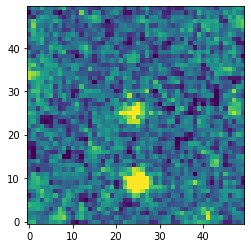

<class 'astropy.nddata.utils.Cutout2D'>


In [17]:
#making the cutout
# replace with fits file directory
cutout35 = fits.open("/Users/iman/Documents/Midd_Coursework/Fall_2022/704/amnh/swiftuvot4/sw00091683035um2_sk.fits")

#picking the center
one = np.zeros((1, 2))
one[0] = [755.82003, 396.32866]

#saving to drive
filename = "/Users/iman/Documents/Midd_Coursework/Fall_2022/704/amnh/swiftuvot2/cutty1.png"
cut1 = cutout(one[0][0], one[0][1], data11a, cutout35, filename)

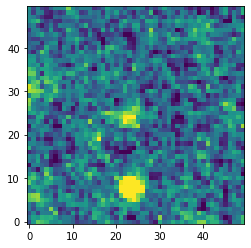

<class 'astropy.nddata.utils.Cutout2D'>


In [18]:
#second cutout
cutout42 = hdu3010a

#picking the center
one = np.zeros((1, 2))
one[0] = [711.48275, 293.03799]  

#saving to drive
filename = "/Users/iman/Documents/Midd_Coursework/Fall_2022/704/amnh/swiftuvot4/cutty2.fits"
cut2 = cutout(one[0][0], one[0][1], data22a, cutout42, filename)

## find counts/second of source

In [19]:
# repeat all sources you'd like to take a closer look at 

In [20]:
from photutils.aperture import CircularAperture
from photutils.aperture import aperture_photometry

In [21]:
aperture = CircularAperture((755.82003, 396.32866), r=5.0)
phot_table = aperture_photometry(data11a, aperture)
phot_table['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_table)

 id  xcenter   ycenter  aperture_sum
       pix       pix                
--- --------- --------- ------------
  1 755.82003 396.32866   0.18538495


In [22]:
aperture2 = CircularAperture((711.48275, 293.03799), r=5.0)
phot_table = aperture_photometry(data22a, aperture2)
phot_table['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_table)

 id  xcenter   ycenter  aperture_sum
       pix       pix                
--- --------- --------- ------------
  1 711.48275 293.03799    0.1235919
